In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
tweets = pd.read_csv("clean_tweets_no_media.csv")

In [9]:
tweets['length'] = tweets.raw_text.str.len()

In [10]:
tweets['has_hashtag'] = np.where(tweets.raw_text.str.contains("#"), 1, 0)

In [12]:
tweets.groupby(by=['city', 'inside'])['id'].count()

city           inside
Boston         0         2703
               1         2091
Chicago        0         2778
               1         2219
Fort Worth     0         1757
               1         1549
Jacksonville   0         2244
               1         1317
Las Vegas      0         2585
               1         1922
New York       0         2379
               1         1808
Phoenix        0         2645
               1         2096
San Antonio    0         2290
               1         1992
San Francisco  0         2577
               1         2079
Washington DC  0         2312
               1         2098
Name: id, dtype: int64

In [23]:
tweets.pivot_table(index="city", values=['id', "inside", "has_hashtag", "length"], aggfunc={'id': "count", "inside": "mean", "has_hashtag": "mean", "length": "median"})

,has_hashtag,id,inside,length
city,,,,
Boston,0.307468,4794,0.436170,102
Chicago,0.329198,4997,0.444066,113
Fort Worth,0.296431,3306,0.468542,124
Jacksonville,0.326874,3561,0.369840,127
Las Vegas,0.344797,4507,0.426448,125
New York,0.433723,4187,0.431813,116
Phoenix,0.411727,4741,0.442101,129
San Antonio,0.407987,4282,0.465203,129
San Francisco,0.422036,4656,0.446521,135


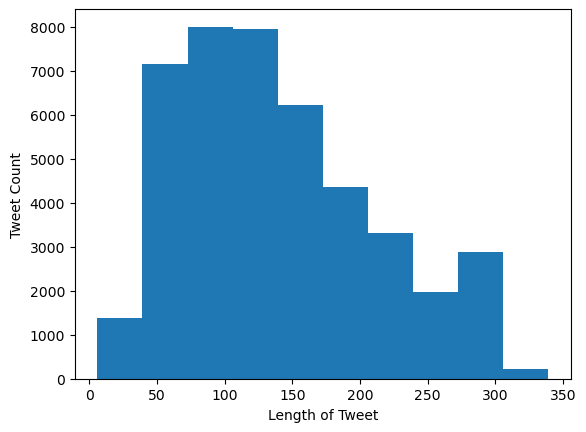

In [66]:
plt.hist(tweets.length)
plt.xlabel("Length of Tweet")
plt.ylabel("Tweet Count")
plt.savefig("length_distribution.png")
#tweets.length.hist()

In [33]:
tweets["date_time"] = pd.to_datetime(tweets.created_at)

In [46]:
tweets['month'] = tweets.date_time.dt.strftime("%m").astype(int)

In [47]:
tweets['hour'] = tweets.date_time.dt.strftime('%H').astype(int)

In [53]:
hours = tweets.pivot_table(index="hour", values="id", aggfunc="count")

In [54]:
months = tweets.pivot_table(index="month", values="id", aggfunc="count")

In [52]:
tweets.date_time.dt.strftime("%Y")

0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
43436    2021
43437    2021
43438    2021
43439    2021
43440    2021
Name: date_time, Length: 43441, dtype: object

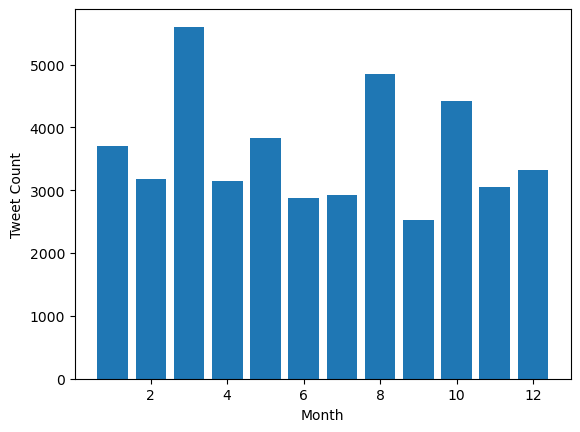

In [62]:
plt.bar(months.index, months.id)
plt.xlabel("Month")
plt.ylabel("Tweet Count")
plt.savefig("monthly_tweet_count.png")

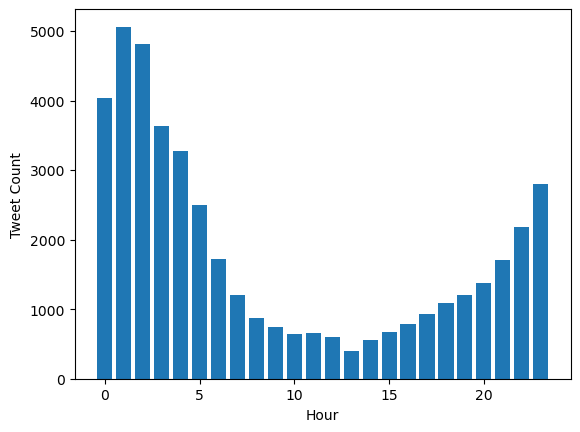

In [63]:
plt.bar(hours.index, hours.id)
plt.xlabel("Hour")
plt.ylabel("Tweet Count")
plt.savefig("hourly_tweet_count.png")